<a href="https://colab.research.google.com/github/ram123-jpg/GitDemo/blob/main/Customer_Segmentation_using_KMeans_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [28]:
!https://www.kaggle.com/code/ibrahimkhalil09/customer-segmentation-using-kmeans-and-pca?scriptVersionId=249386705&cellId=1

/bin/bash: line 1: https://www.kaggle.com/code/ibrahimkhalil09/customer-segmentation-using-kmeans-and-pca?scriptVersionId=249386705: No such file or directory


In [29]:
df = pd.read_csv('/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Check for missing data**

In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**There are 24 missing values in "Income" variable. We will replace it with its median.**

In [7]:
df['Income'].fillna(df['Income'].median(), inplace = True)

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
dates = []

for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


**Calculate "Age" of a customer by the "Year_Birth".(indicating the birth year of the respective person.) We will calculate age till 2015. As we have data till 2014.**

In [9]:
df['Age'] = 2015 - df['Year_Birth']

In [10]:
df['Annual_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [11]:
df =df.rename(columns={"Income": "Annual_Income","Recency":"Purchase_Frequency"})

In [12]:
df = df[['Annual_Income', 'Annual_Spending', 'Age', 'Purchase_Frequency']]

In [13]:
df.head()

,Annual_Income,Annual_Spending,Age,Purchase_Frequency
0,58138.0,1617,58,58
1,46344.0,27,61,38
2,71613.0,776,50,26
3,26646.0,53,31,26
4,58293.0,422,34,94


In [14]:
df.describe()

,Annual_Income,Annual_Spending,Age,Purchase_Frequency
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,605.798214,46.194196,49.109375
std,25037.955891,602.249288,11.984069,28.962453
min,1730.000000,5.000000,19.000000,0.000000
25%,35538.750000,68.750000,38.000000,24.000000
50%,51381.500000,396.000000,45.000000,49.000000
75%,68289.750000,1045.500000,56.000000,74.000000
max,666666.000000,2525.000000,122.000000,99.000000


Text(0.5, 0, 'Attributes')

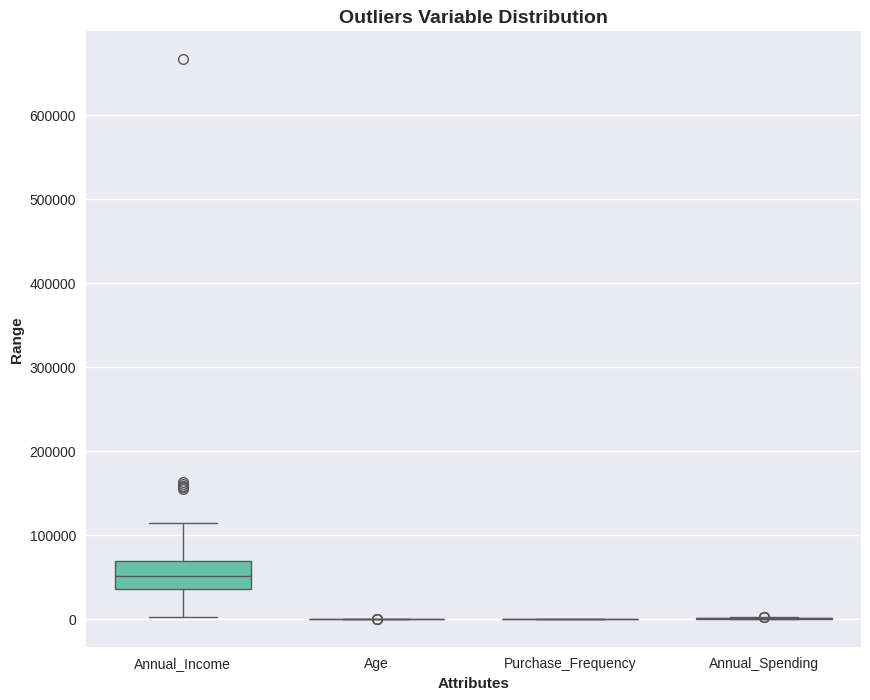

In [15]:
cols = ['Annual_Income','Age', 'Purchase_Frequency', 'Annual_Spending']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[cols], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [16]:
# Removing (statistical) outliers for Annual_Income
Q1 = df.Annual_Income.quantile(0.05)
Q3 = df.Annual_Income.quantile(0.95)
IQR = Q3 - Q1
df_cleaned = df[(df.Annual_Income >= Q1 - 1.5*IQR) & (df.Annual_Income <= Q3 + 1.5*IQR)]
print(f"Before {df.shape}\nAfter: {df_cleaned.shape}")

Before (2240, 4)
After: (2239, 4)


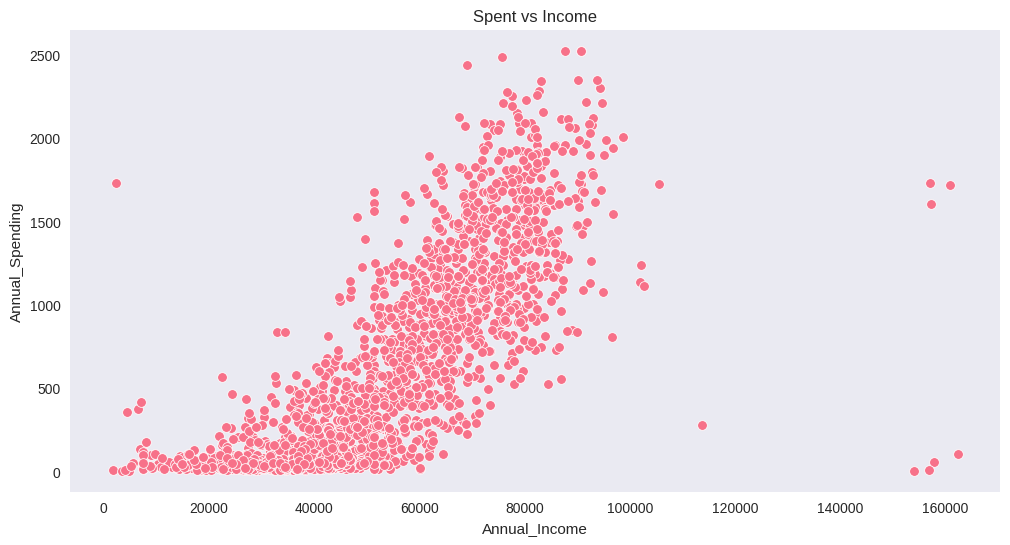


Correlation between Age_on_2014 and Spent: 0.7892957853161519


In [17]:
df=df_cleaned
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Annual_Income', y = 'Annual_Spending')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Annual_Income'].corr(df['Annual_Spending'])}")

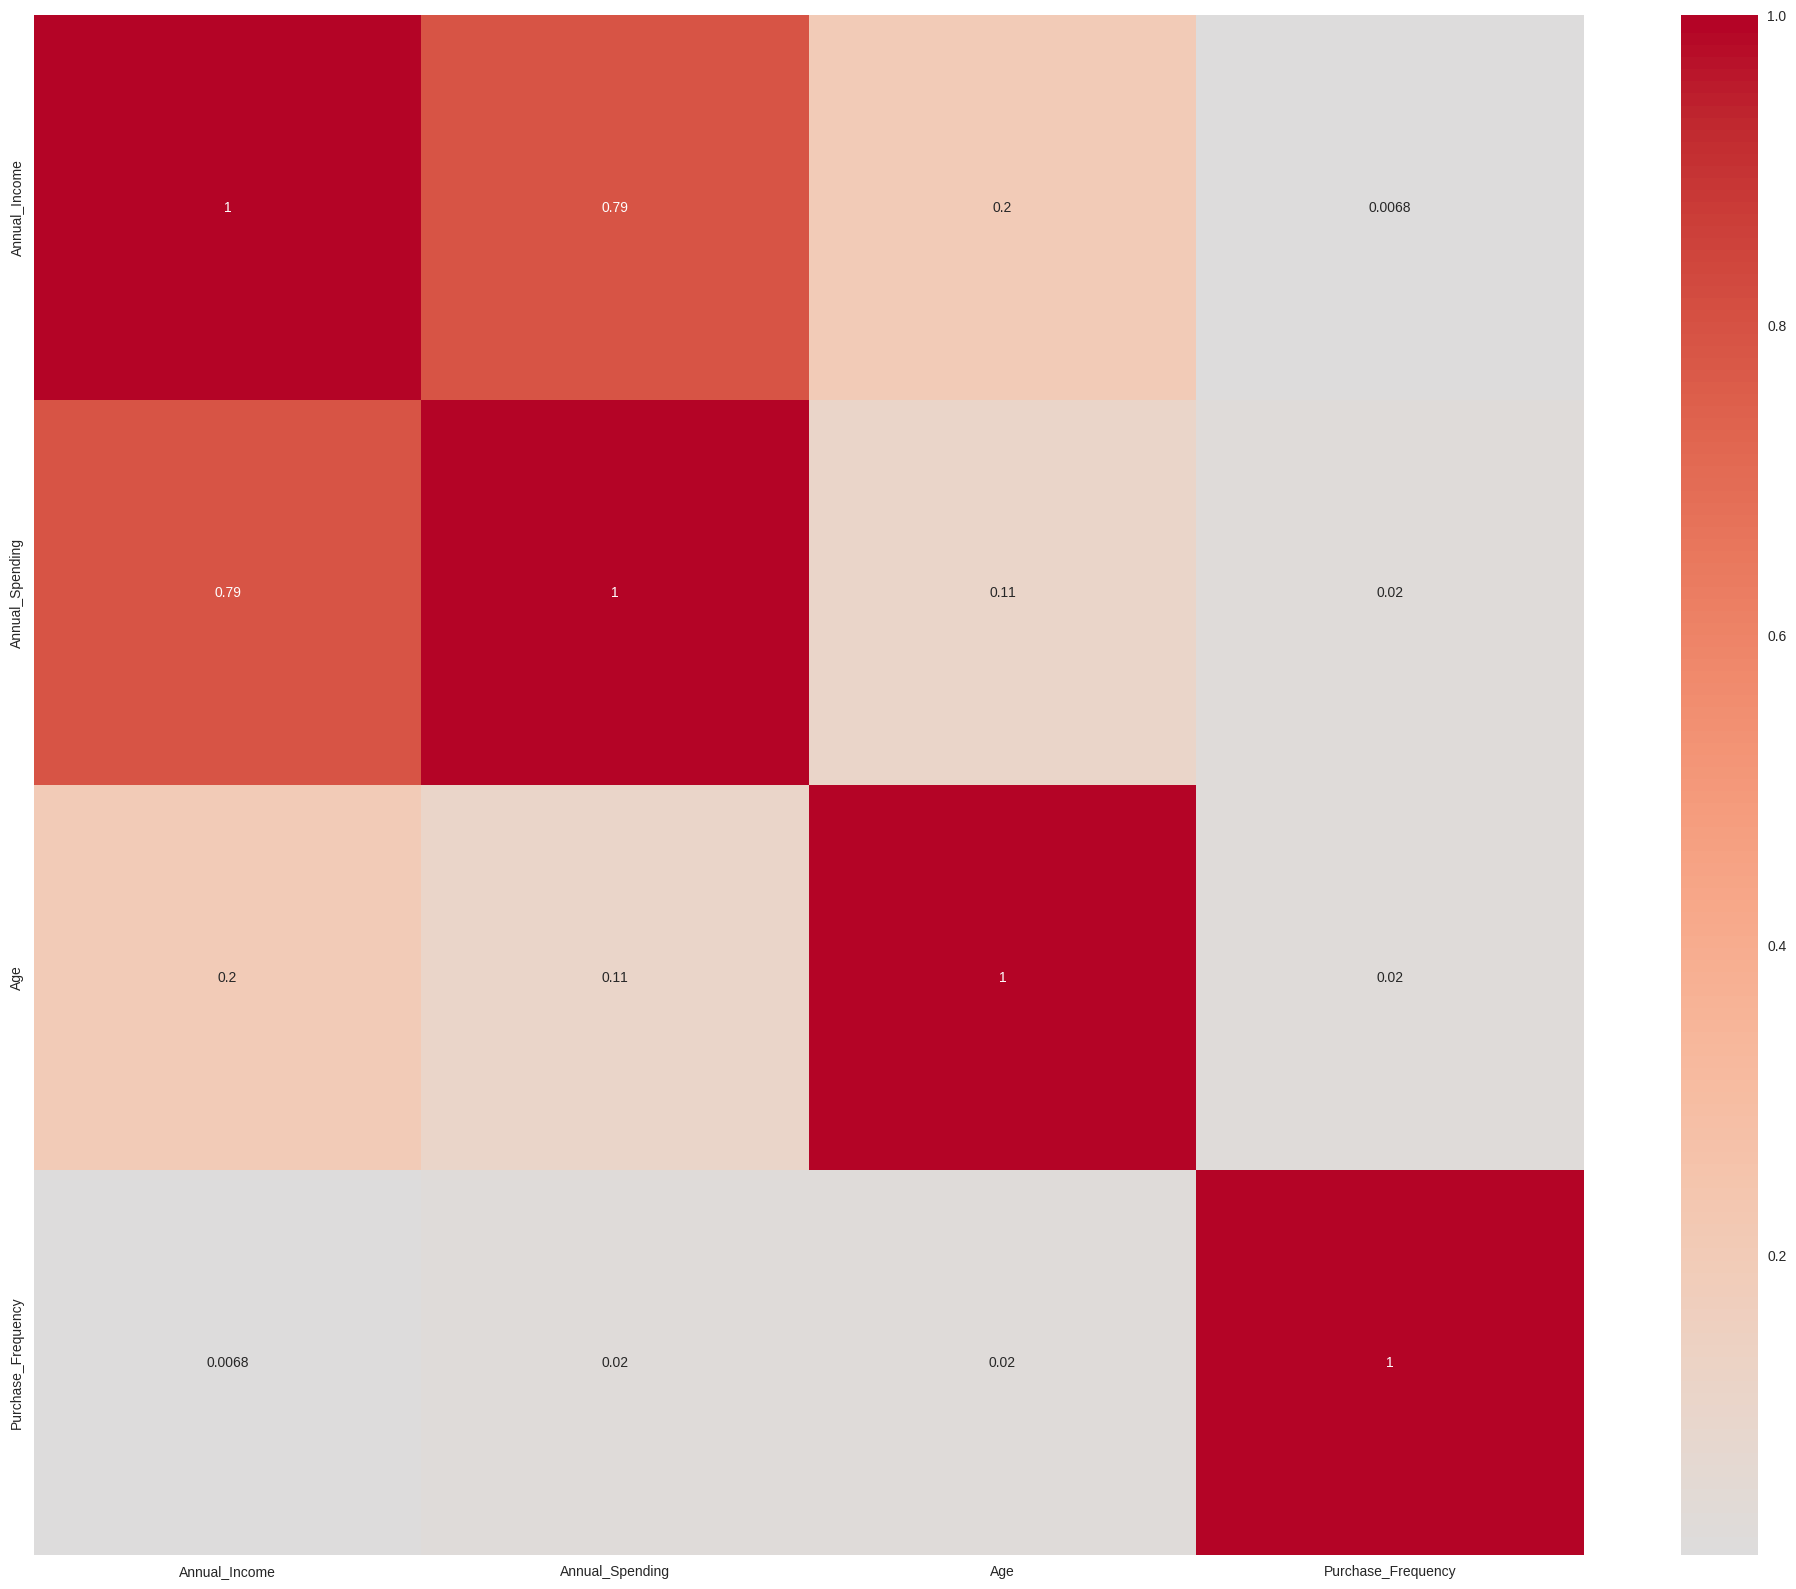

In [18]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

# Data Normalization - Why It Matters

**When to Use Normalization:**
   - Features have different scales (e.g., age vs income)
   - Using distance-based algorithms (K-means, hierarchical)
   - Want all features to contribute equally to clustering

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Annual_Income', 'Annual_Spending', 'Age', 'Purchase_Frequency']
df_scaled.head()


,Annual_Income,Annual_Spending,Age,Purchase_Frequency
0,0.288446,1.678944,0.984922,0.306624
1,-0.262524,-0.961639,1.235281,-0.384051
2,0.917946,0.282258,0.317300,-0.798456
3,-1.182738,-0.918460,-1.268304,-0.798456
4,0.295687,-0.305645,-1.017946,1.549838


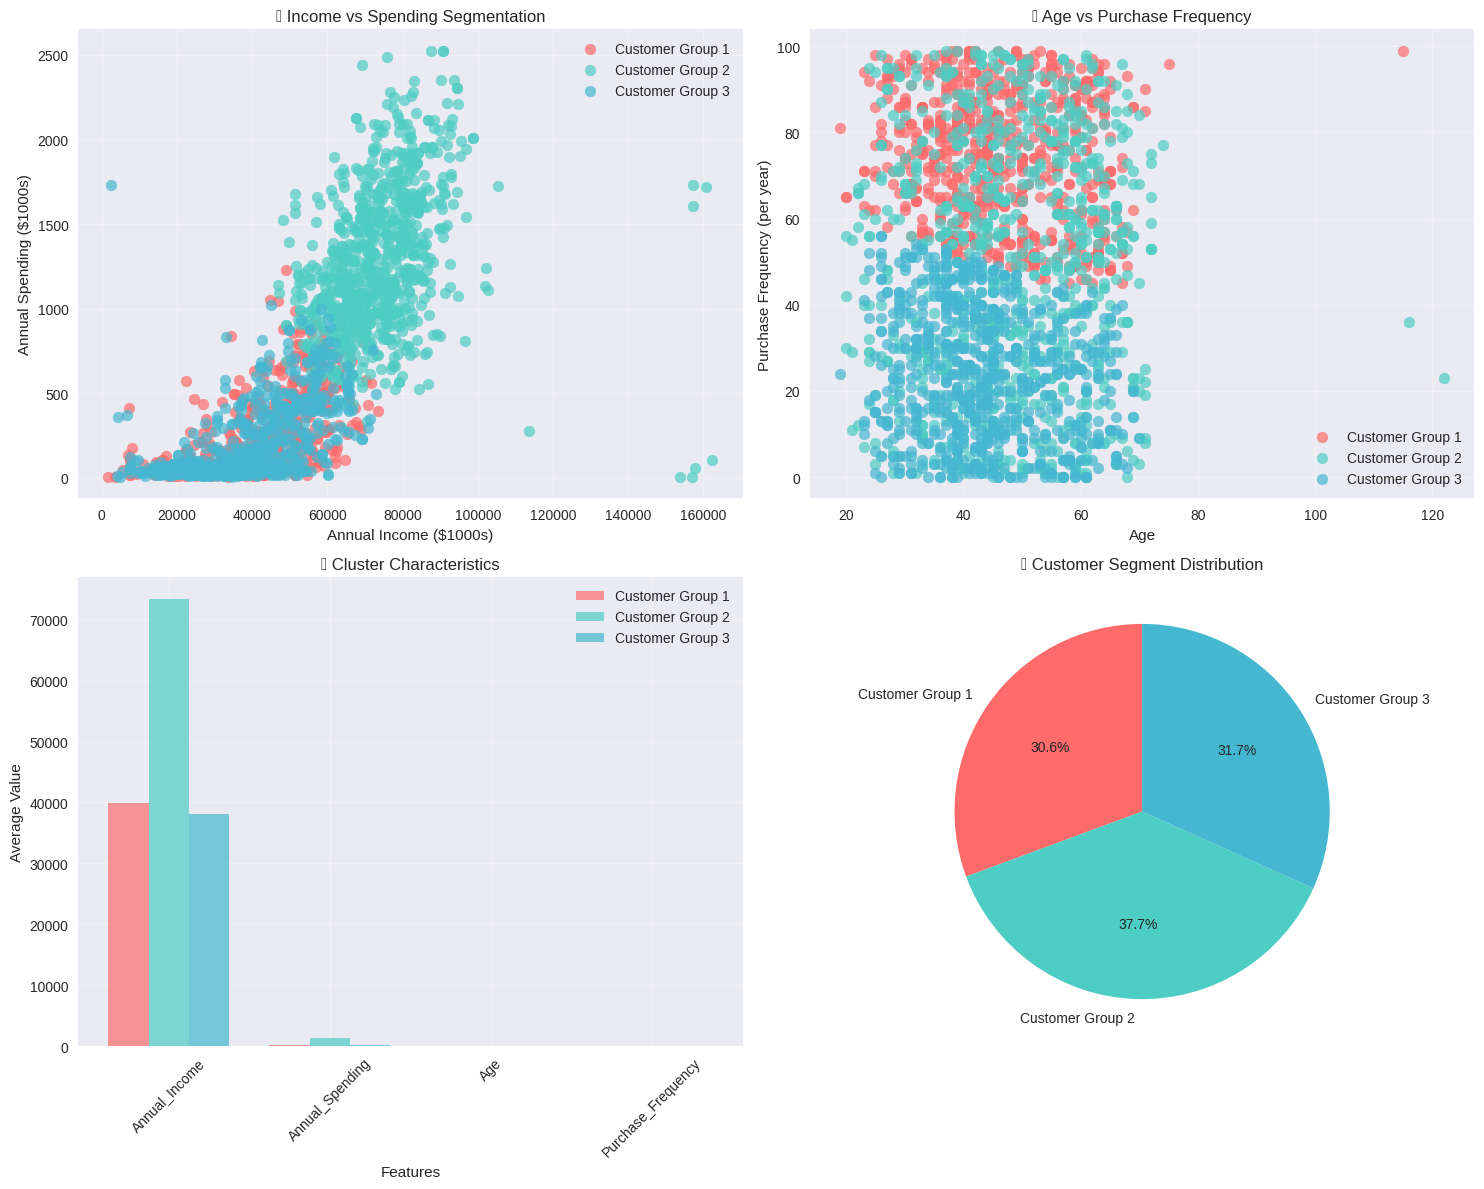


🎯 CUSTOMER SEGMENTATION RESULTS:

CUSTOMER GROUP 1:
   Size: 686 customers (30.6%)
   Avg Income: $39986k
   Avg Spending: $217k
   Avg Age: 46.3 years
   Avg Purchase Frequency: 75.1 times/year

CUSTOMER GROUP 2:
   Size: 843 customers (37.7%)
   Avg Income: $73359k
   Avg Spending: $1266k
   Avg Age: 48.6 years
   Avg Purchase Frequency: 49.2 times/year

CUSTOMER GROUP 3:
   Size: 710 customers (31.7%)
   Avg Income: $38133k
   Avg Spending: $199k
   Avg Age: 43.3 years
   Avg Purchase Frequency: 23.9 times/year


In [20]:
def perform_customer_segmentation(df):

    features = ['Annual_Income', 'Annual_Spending', 'Age', 'Purchase_Frequency']
    X = df[features].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Income vs Spending
    ax1 = axes[0, 0]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    cluster_names = ['Customer Group 1', 'Customer Group 2', 'Customer Group 3']

    for i in range(3):
        cluster_data = df[df['Cluster'] == i]
        ax1.scatter(cluster_data['Annual_Income'], cluster_data['Annual_Spending'],
                   c=colors[i], alpha=0.7, s=60, label=cluster_names[i])

    ax1.set_xlabel('Annual Income ($1000s)')
    ax1.set_ylabel('Annual Spending ($1000s)')
    ax1.set_title('💰 Income vs Spending Segmentation')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Age vs Purchase Frequency
    ax2 = axes[0, 1]
    for i in range(3):
        cluster_data = df[df['Cluster'] == i]
        ax2.scatter(cluster_data['Age'], cluster_data['Purchase_Frequency'],
                   c=colors[i], alpha=0.7, s=60, label=cluster_names[i])

    ax2.set_xlabel('Age')
    ax2.set_ylabel('Purchase Frequency (per year)')
    ax2.set_title('👥 Age vs Purchase Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Cluster characteristics
    ax3 = axes[1, 0]
    cluster_means = df.groupby('Cluster')[features].mean()

    x = np.arange(len(features))
    width = 0.25

    for i in range(3):
        ax3.bar(x + i*width, cluster_means.iloc[i], width,
               label=cluster_names[i], color=colors[i], alpha=0.7)

    ax3.set_xlabel('Features')
    ax3.set_ylabel('Average Value')
    ax3.set_title('📈 Cluster Characteristics')
    ax3.set_xticks(x + width)
    ax3.set_xticklabels(features, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Cluster sizes
    ax4 = axes[1, 1]
    cluster_sizes = df['Cluster'].value_counts().sort_index()
    pie_colors = colors

    ax4.pie(cluster_sizes, labels=cluster_names, autopct='%1.1f%%',
           colors=pie_colors, startangle=90)
    ax4.set_title('🥧 Customer Segment Distribution')

    plt.tight_layout()
    plt.show()

    # Print segment analysis
    print("\n🎯 CUSTOMER SEGMENTATION RESULTS:")
    print("="*50)

    for i, name in enumerate(cluster_names):
        cluster_data = df[df['Cluster'] == i]
        print(f"\n{name.upper()}:")
        print(f"   Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
        print(f"   Avg Income: ${cluster_data['Annual_Income'].mean():.0f}k")
        print(f"   Avg Spending: ${cluster_data['Annual_Spending'].mean():.0f}k")
        print(f"   Avg Age: {cluster_data['Age'].mean():.1f} years")
        print(f"   Avg Purchase Frequency: {cluster_data['Purchase_Frequency'].mean():.1f} times/year")

    return df, kmeans

# Perform customer segmentation
customer_df_segmented, customer_kmeans = perform_customer_segmentation(df)

# Cluster Visualization using PCA

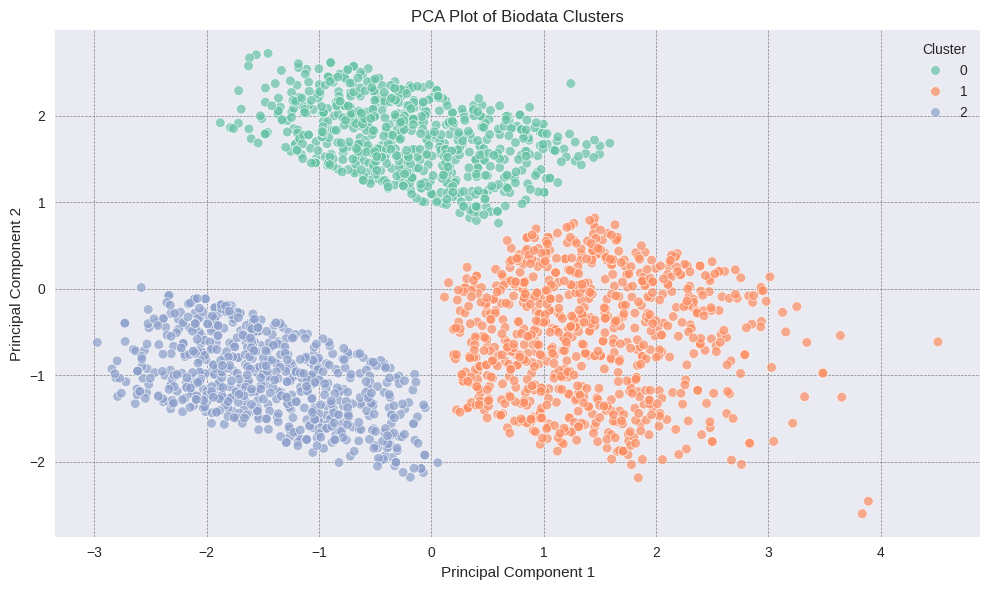

In [21]:
from sklearn.decomposition import PCA

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(title = 'Cluster')


plt.show()


**Choosing the number of cluster using Elbow method**

**Near +1**: The sample is far away from the neighboring clusters, indicating it is well-clustered.

**0**: The sample is on or very close to the decision boundary between two neighboring clusters.

**Near -1**: The sample may be assigned to the wrong cluster.

The number of clusters that maximizes the silhouette score is often considered the best choice.

Elbow Method to determine the number of clusters to be formed:


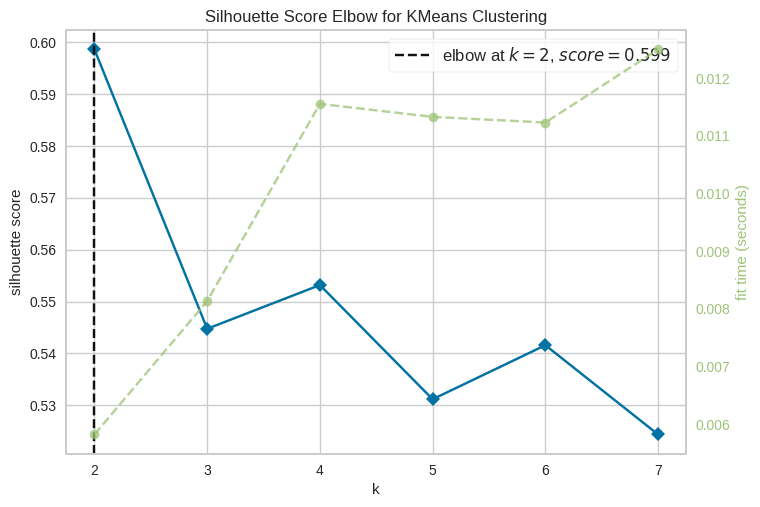

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print("Elbow Method to determine the number of clusters to be formed:")
elbow = KElbowVisualizer(KMeans(), k = (2,8), metric='silhouette')
elbow.fit(df)
elbow.show()

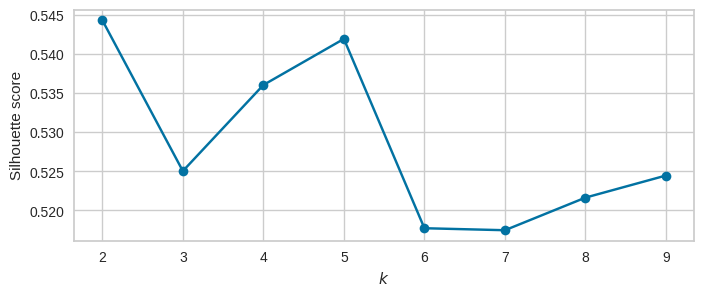

In [23]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

**Apply KMeans algorithm with K=2**

In [24]:
kmeans = KMeans(n_clusters= 2, random_state=42)
cluster_labels = kmeans.fit_predict(df)
df['Cluster'] = cluster_labels
df.to_excel('Clustered_data.xlsx', index = False)

In [ ]:
df['Cluster'] = cluster_labels
df.head()

**Number of datas distributed in clusters**

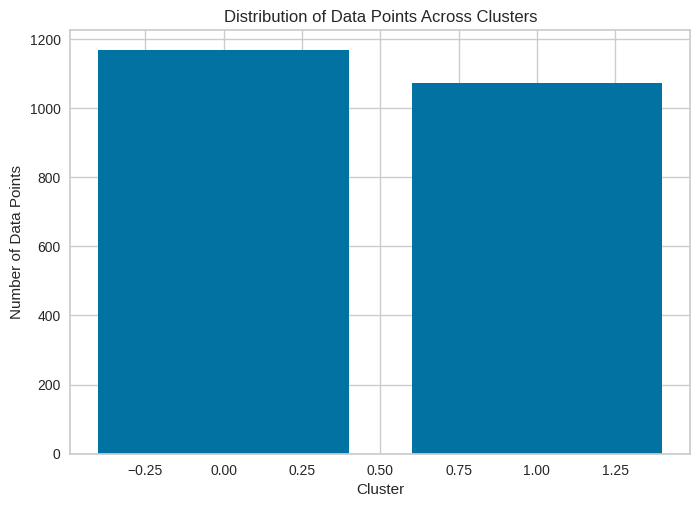

In [25]:
cluster_distribution = df['Cluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

**Cluster's Profile based on Income and Spending**

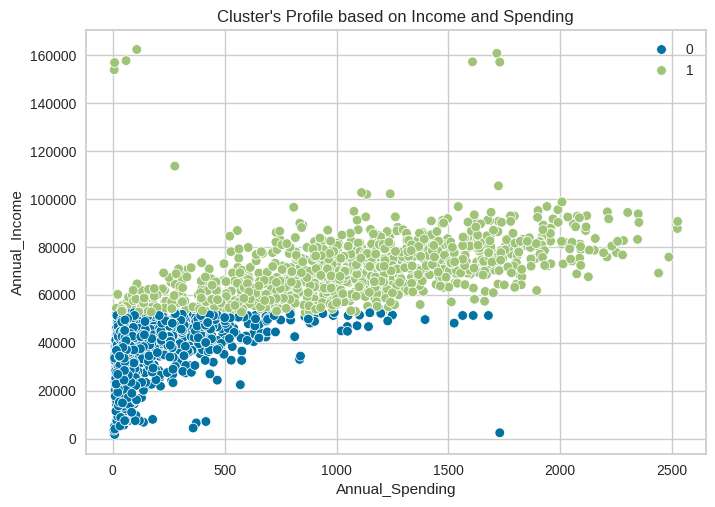

In [26]:
sns.scatterplot(df, x = 'Annual_Spending', y = 'Annual_Income', hue = 'Cluster')
plt.title("Cluster's Profile based on Income and Spending")
plt.legend()
plt.show()

**Cluster Pattern**
* Cluster 0: High spending and High Income
* Cluster 1: Low spending and average to low income